# Research Methods- FIN-40055


### Dr Robina Iqbal

# Modelling asset returns and data visualization

# 1. Financial Returns
In this chapter we cover asset return calculations with an emphasis on equity returns. It is
important to understand the different ways in which asset returns are calculated. Simple returns are most
commonly used for money and portfolio calculations in practice.
Continuously compounded returns, in contrast, have nicer properties that make mathematical and statistical modeling easie

##### Install required  Package

In [1]:
#get working directory
getwd()

[1] "C:/Users/mnf13"

In [2]:
#set working director
setwd('C:/Users/mnf13/RM')

In [3]:
install.packages("PerformanceAnalytics")

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'PerformanceAnalytics'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\mnf13\Anaconda3\envs\R\Lib\R\library\00LOCK\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll to C:\Users\mnf13\Anaconda3\envs\R\Lib\R\library\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll: Permission denied"Warning message:
"restored 'PerformanceAnalytics'"


The downloaded binary packages are in
	C:\Users\mnf13\AppData\Local\Temp\RtmpSmwTHz\downloaded_packages


In [4]:
library (PerformanceAnalytics)

Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



Load data from working directory

In [7]:
#Microsoft daily close prices
ms<-read.csv("Microsoft.csv", header=TRUE)

In [8]:
head(ms)

Dates,Close
09/10/2002,22.00
10/10/2002,23.19
11/10/2002,24.44
14/10/2002,24.65
15/10/2002,26.15
16/10/2002,25.21


In [20]:
#Standard and poor daily close prices
sp<-read.csv("SP.csv", header=TRUE)

In [21]:
head(sp)

Dates,Close
09/10/2002,776.76
10/10/2002,803.92
11/10/2002,835.32
14/10/2002,841.44
15/10/2002,881.27
16/10/2002,860.02


In [22]:
class(ms)

[1] "data.frame"

### We need to convert data "data.frame" class to a time series object othersie it will give us an error.

In [23]:
require(zoo)

In [24]:
#microsoft
ms$Dates <- as.Date(ms$Dates, "%d/%m/%Y")
class(ms$Dates)


[1] "Date"

In [25]:
ms.z = zoo(x=ms$Close, order.by=ms$Dates)

In [26]:
head(ms.z)

2002-10-09 2002-10-10 2002-10-11 2002-10-14 2002-10-15 2002-10-16 
     22.00      23.19      24.44      24.65      26.15      25.21 

In [27]:
#S and P
sp$Dates <- as.Date(sp$Dates, "%d/%m/%Y")
class(sp$Dates)

[1] "Date"

In [28]:
sp.z = zoo(x=sp$Close, order.by=sp$Dates)

In [29]:
head(sp.z)

2002-10-09 2002-10-10 2002-10-11 2002-10-14 2002-10-15 2002-10-16 
    776.76     803.92     835.32     841.44     881.27     860.02 

# Convert daily data into monthly data

### End-of-month prices can be extracted from the daily prices using the xts function to.monthly()

In [30]:
ms.monthly<-to.monthly(ms.z,OHLC = FALSE)

In [31]:
head(ms.monthly)

Oct 2002 Nov 2002 Dec 2002 Jan 2003 Feb 2003 Mar 2003 
   26.74    28.84    25.85    23.73    23.70    24.21 

In [32]:
sp.monthly<-to.monthly(sp.z,OHLC = FALSE)

In [33]:
head(sp.monthly)

Oct 2002 Nov 2002 Dec 2002 Jan 2003 Feb 2003 Mar 2003 
  885.76   936.31   879.82   855.70   841.15   848.18 

## Merge two data set

In [34]:
#combine Microsoft and SP daily data
ms.sp.dp<-merge(ms.z, sp.z)


In [35]:
head(ms.sp.dp)

            ms.z   sp.z
2002-10-09 22.00 776.76
2002-10-10 23.19 803.92
2002-10-11 24.44 835.32
2002-10-14 24.65 841.44
2002-10-15 26.15 881.27
2002-10-16 25.21 860.02

In [36]:
#combine Microsoft and sP monthly data
ms.sp.dm<-merge(ms.monthly, sp.monthly)

In [37]:
head(ms.sp.dm)

         ms.monthly sp.monthly
Oct 2002      26.74     885.76
Nov 2002      28.84     936.31
Dec 2002      25.85     879.82
Jan 2003      23.73     855.70
Feb 2003      23.70     841.15
Mar 2003      24.21     848.18

### Caluculated Continously compounding Returns(log returns)

In [38]:
#Microsoft montly and daily log  returns
ms.monthly.r<-Return.calculate(ms.monthly, method = "log")
ms.daily.r<-Return.calculate(ms.z, method = "log")
head(ms.monthly.r)
head(ms.daily.r)

    Oct 2002     Nov 2002     Dec 2002     Jan 2003     Feb 2003     Mar 2003 
          NA  0.075602741 -0.109452711 -0.085570531 -0.001265022  0.021290723 

  2002-10-09   2002-10-10   2002-10-11   2002-10-14   2002-10-15   2002-10-16 
          NA  0.052678698  0.052499983  0.008555766  0.059072290 -0.036608449 

In [39]:
#S and P montly and daily log  returns
sp.monthly.r<-Return.calculate(sp.monthly, method = "log")
sp.daily.r<-Return.calculate(sp.z, method = "log")
head(sp.monthly.r)
head(sp.daily.r)

    Oct 2002     Nov 2002     Dec 2002     Jan 2003     Feb 2003     Mar 2003 
          NA  0.055500585 -0.062229277 -0.027797494 -0.017149844  0.008322874 

  2002-10-09   2002-10-10   2002-10-11   2002-10-14   2002-10-15   2002-10-16 
          NA  0.034368339  0.038315123  0.007299825  0.046249339 -0.024408404 

In [40]:
#daily and monhtly log returns for merged data
ms.sp.dp.r<-Return.calculate(ms.sp.dp, method = "log")
ms.sp.dm.r<-Return.calculate(ms.sp.dm, method = "log")
head(ms.sp.dp.r)
tail(ms.sp.dm.r)


                   ms.z         sp.z
2002-10-09           NA           NA
2002-10-10  0.052678698  0.034368339
2002-10-11  0.052499983  0.038315123
2002-10-14  0.008555766  0.007299825
2002-10-15  0.059072290  0.046249339
2002-10-16 -0.036608449 -0.024408404

           ms.monthly    sp.monthly
May 2022 -0.020568992  5.324247e-05
Jun 2022 -0.056909623 -8.765157e-02
Jul 2022  0.089014587  8.720134e-02
Aug 2022 -0.071109420 -4.336702e-02
Sep 2022 -0.115710377 -9.804920e-02
Oct 2022  0.005737054  1.495887e-02

### To calculate simple returns, just replace "log" with "simple"

## Removing NAs values

In [41]:
ms.monthly.r<-ms.monthly.r[-1]
ms.daily.r<-ms.daily.r[-1]
sp.monthly.r<-sp.monthly.r[-1]
sp.daily.r<-sp.daily.r[-1]
ms.sp.dp.r<-ms.sp.dp.r[-1]
ms.sp.dm.r<-ms.sp.dm.r[-1]

In [42]:
head(ms.monthly.r)

    Nov 2002     Dec 2002     Jan 2003     Feb 2003     Mar 2003     Apr 2003 
 0.075602741 -0.109452711 -0.085570531 -0.001265022  0.021290723  0.054262859 

In [43]:
head(ms.sp.dm)

         ms.monthly sp.monthly
Oct 2002      26.74     885.76
Nov 2002      28.84     936.31
Dec 2002      25.85     879.82
Jan 2003      23.73     855.70
Feb 2003      23.70     841.15
Mar 2003      24.21     848.18

# 2. Time Plot

A natural graphical descriptive statistic for time series data is a time plot. This is simply a line plot with the time series data on the y-axis and the time index on the x-axis. Time plots are
useful for quickly visualizing many features of the time series data.


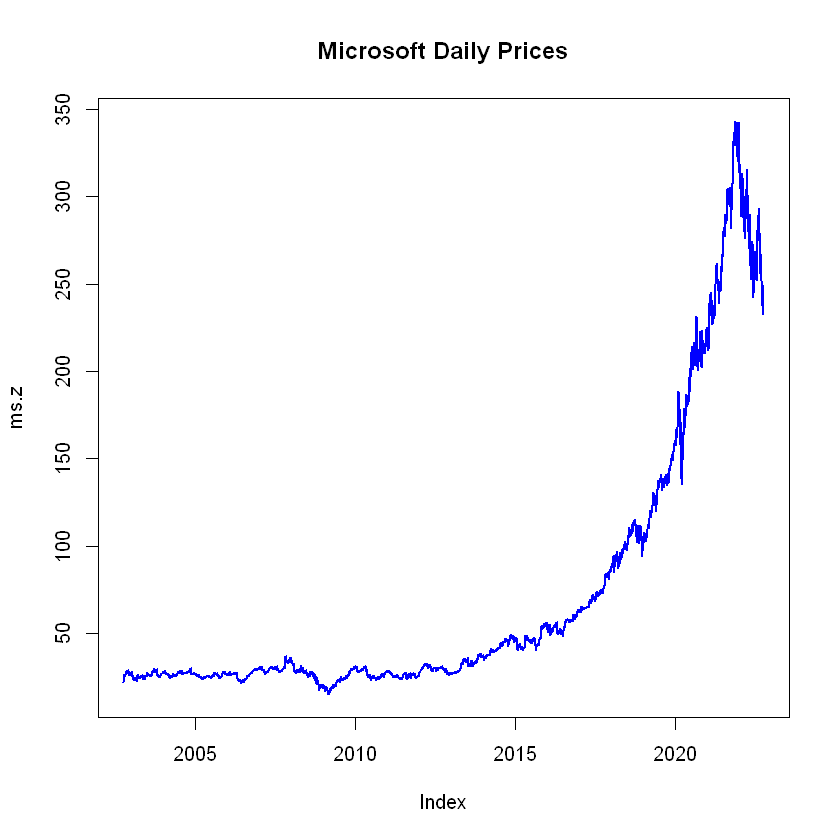

In [44]:
plot.zoo(ms.z, main = "Microsoft Daily Prices", lwd = 2, col = "blue")

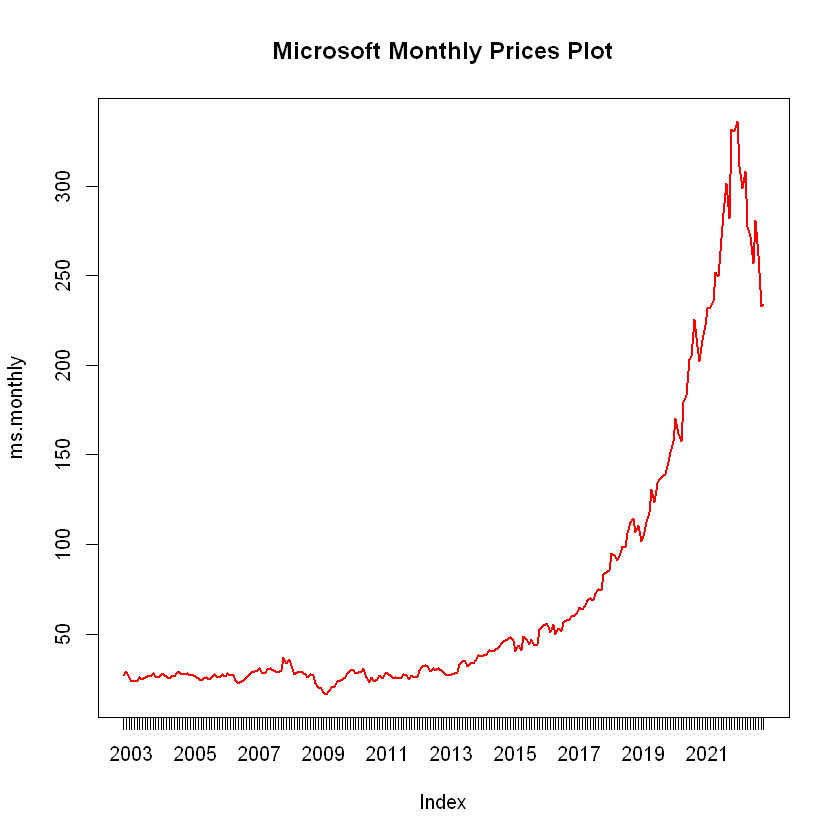

In [45]:
plot.zoo(ms.monthly, main = "Microsoft Monthly Prices Plot", lwd = 2, col = "red")

#### Combined plot for daily prices

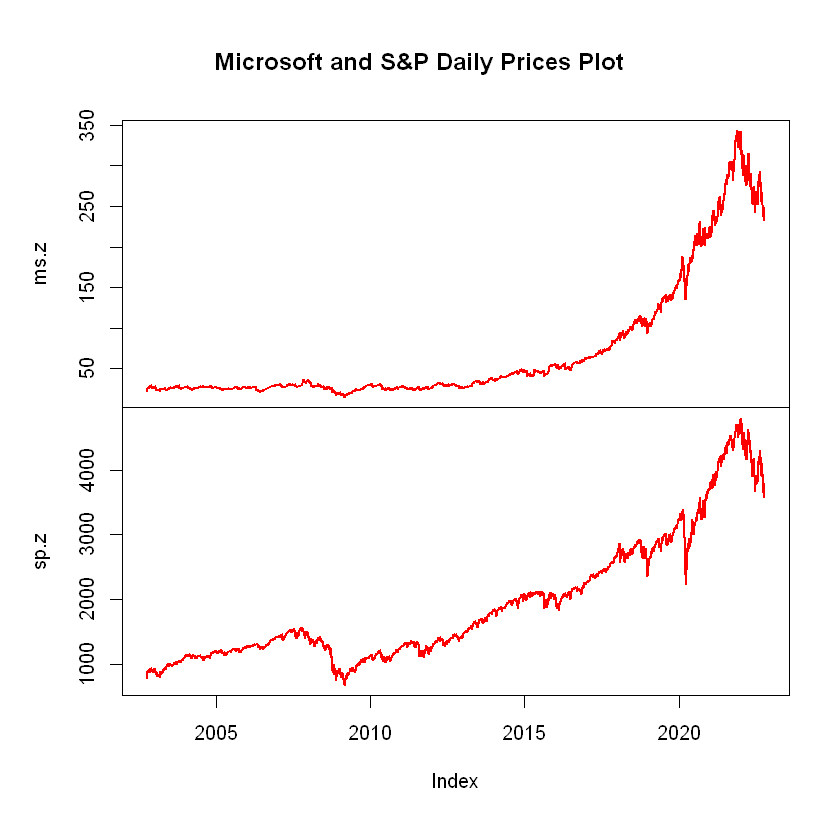

In [127]:
plot.zoo(ms.sp.dp, main = "Microsoft and S&P Daily Prices Plot", lwd = 2, col = "red")

## Plotting returns of the both stock on the same graph

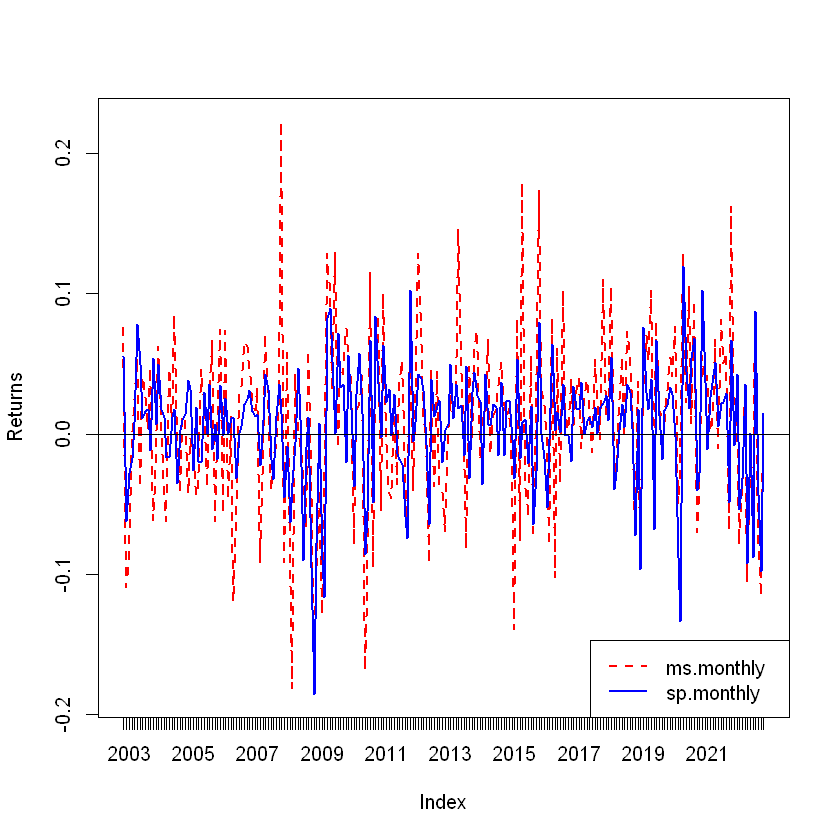

In [129]:
plot.zoo(ms.sp.dm.r, plot.type = "single", main = "", col = c("red", "blue"),
lty = c("dashed", "solid"), lwd = 2, ylab = "Returns")
abline(h = 0)
legend(x = "bottomright", legend = colnames(ms.sp.dm.r),
lty = c("dashed", "solid"), lwd = 2, col = c("red", "blue"))

# 3. Histogram

A histogram of returns is a graphical summary used to describe the general shape of the unknown pdf. The histograms of the daily and monthly returns on Microsoft stock and the S&P
500 index created using the R function hist():

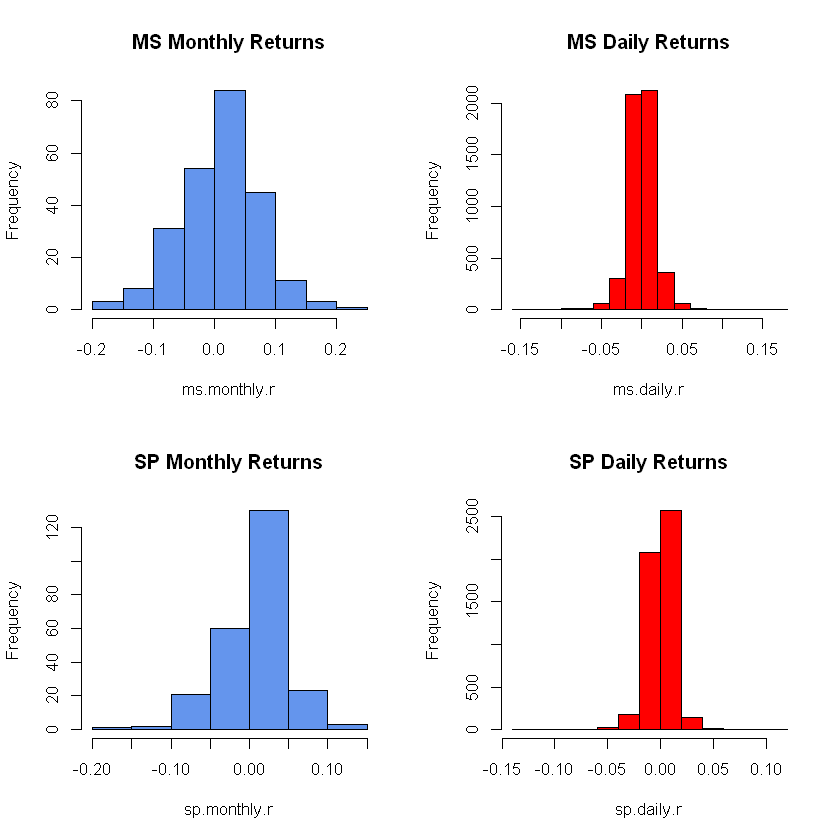

In [130]:
# creating multiple plot in one window, 2 rows and 2 columns
par(mfrow = c(2, 2))
hist(ms.monthly.r, main = "MS Monthly Returns", col = "cornflowerblue")
hist(ms.daily.r, main = "MS Daily Returns", col = "Red")
hist(sp.monthly.r, main = "SP Monthly Returns", col = "cornflowerblue")
hist(sp.daily.r, main = "SP Daily Returns", col = "Red")
par(mfrow = c(1, 1))

# 4. QQ Plot

The quantile-quantile plot (QQ-plot) gives a graphical comparison of the empirical quantiles of a data sample to those from a specified reference distribution.

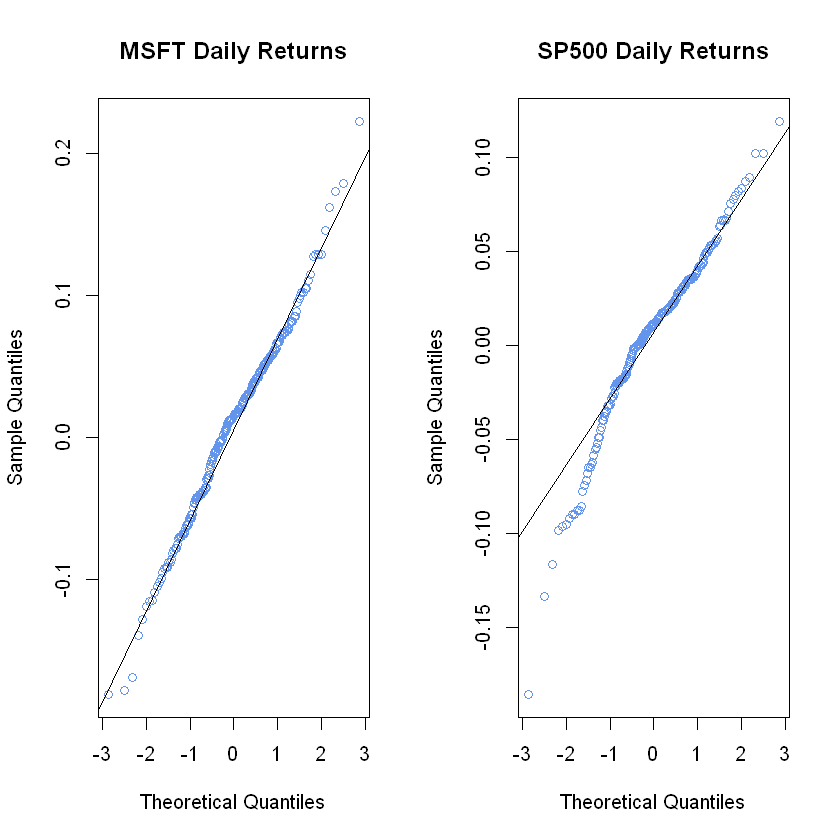

In [131]:
par(mfrow = c(1, 2))
qqnorm(ms.monthly.r, main = "MSFT Daily Returns", col = "cornflowerblue")
qqline(ms.monthly.r)
qqnorm(sp.monthly.r, main = "SP500 Daily Returns", col = "cornflowerblue")
qqline(sp.monthly.r)
par(mfrow = c(1, 1))

# 5. Equity Plot

To directly compare the investment performance of two or more assets, plot the simple multiperiod cumulative returns of each asset on the same graph. This type of graph, sometimes
called an equity curve, shows how a one dollar investment amount in each asset grows over
time.

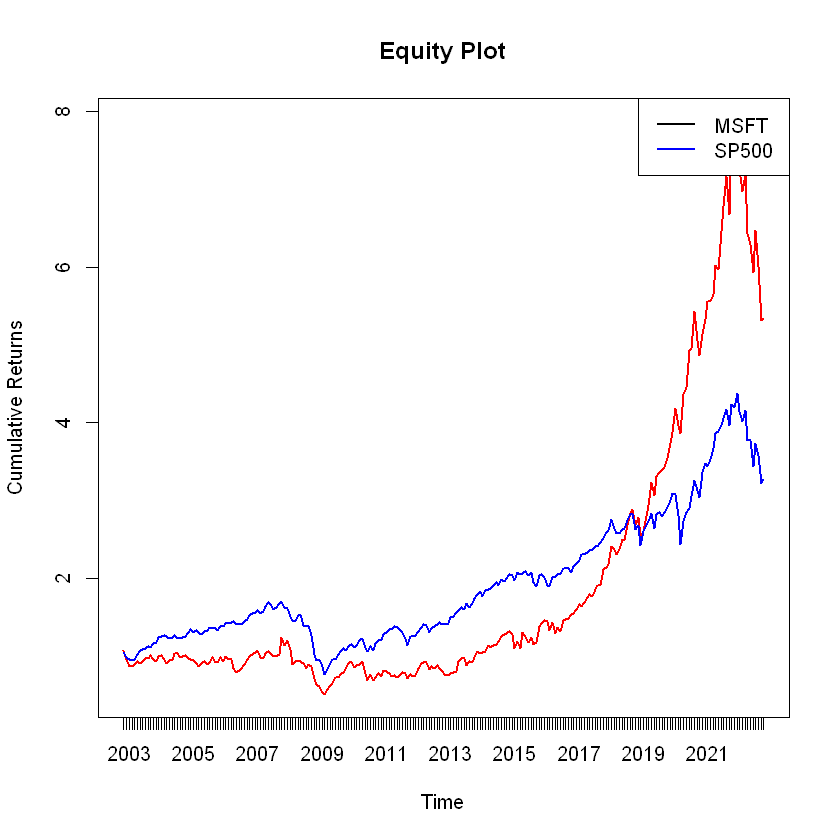

In [140]:
equityCurveMsft = cumprod(1 + ms.monthly.r)
equityCurveSp500 = cumprod(1 + sp.monthly.r)
dataToPlot = merge(equityCurveMsft, equityCurveSp500)
plot.zoo(dataToPlot, plot.type = "single",main= "Equity Plot", ylab = "Cumulative Returns",xlab = "Time", col = c("red",
"blue"), lwd = 2)
legend(x = "topright", legend = c("MSFT", "SP500"), col = c("black", "blue"), lwd = 2)


# 6. Shape Characteristics of the Empirical Distribution


In [139]:
#Monthly data
statsMonthly = rbind(apply(ms.sp.dm.r, 2, mean),
apply(ms.sp.dm.r, 2, var), apply(ms.sp.dm.r, 2, sd),
apply(ms.sp.dm.r, 2, skewness), apply(ms.sp.dm.r, 2, kurtosis))
rownames(statsMonthly) = c("Mean", "Variance", "Std Dev", "Skewness", "Excess
Kurtosis")
round(statsMonthly, digits = 4)

,ms.monthly,sp.monthly
Mean,0.0090,0.0059
Variance,0.0041,0.0018
Std Dev,0.0639,0.0428
Skewness,-0.1203,-0.8242
Excess Kurtosis,0.5583,1.9220


# 7. Box plots

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can
tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


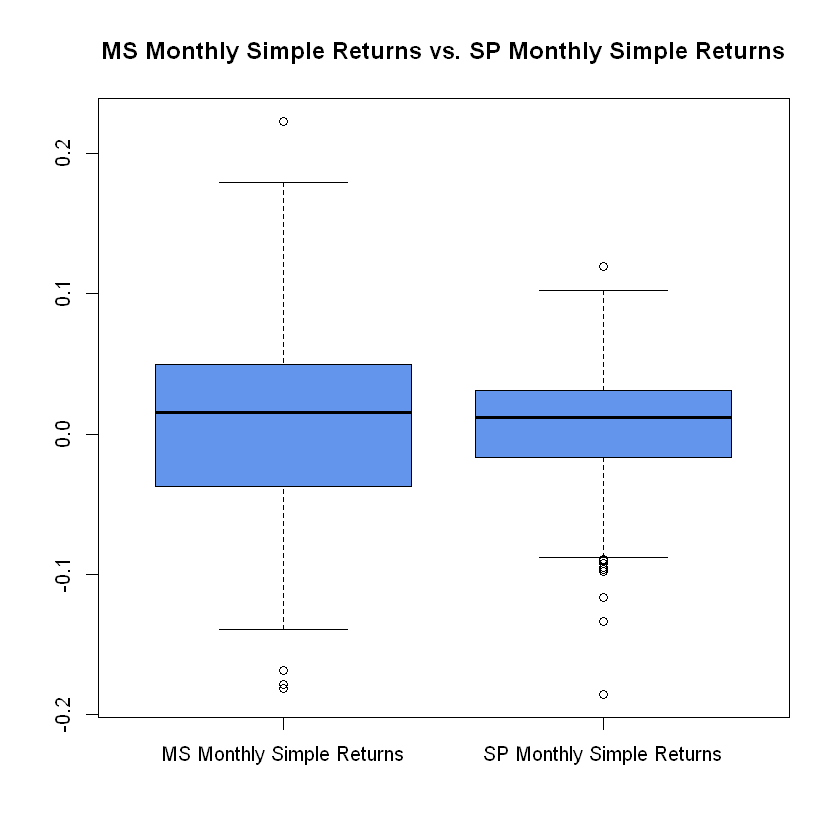

In [141]:
####Box plot
dataToPlot = merge(ms.monthly.r, sp.monthly.r)
colnames(dataToPlot) = c("MS Monthly Simple Returns", "SP Monthly Simple Returns")
boxplot(coredata(dataToPlot), main = "MS Monthly Simple Returns vs. SP Monthly Simple Returns",
col = "cornflowerblue")

# End of Lecture